# Overhead experiment, with runtime, AWS Lambda, various state sizes
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/178587d3e78ca0a3526dee4a9e0f8540cac2fc69

In [9]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [11, 8]
rcParams['figure.dpi'] = 600 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [18]:
fiftykb_data = pd.read_csv("with_runtime/aws_lambda_50kb.csv")
fiftykb_data["stateflow"] = fiftykb_data["ACTOR_CONSTRUCTION"] + fiftykb_data["ROUTING_DURATION"] + fiftykb_data["EVENT_SERIALIZATION_DURATION"] + fiftykb_data["STATE_SERIALIZATION_DURATION"] 
fiftykb_data["aws"] = fiftykb_data["READ_STATE"] + fiftykb_data["KEY_LOCKING"] + fiftykb_data["WRITE_STATE"]

fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.050828,0.122578,0.026766,0.014249,19.806671,6.345428,6.609045,0.214421,32.761144
std,29.011492,29.011492,0.004337,0.005759,0.003028,0.002753,17.876507,3.327016,2.064525,0.009071,18.466893
min,0.000000,0.000000,0.045262,0.114043,0.024072,0.012251,16.966459,4.792406,5.828457,0.198553,27.703464
25%,24.750000,24.750000,0.048455,0.119057,0.025651,0.013325,17.559893,5.349930,6.107275,0.208141,29.573319
50%,49.500000,49.500000,0.049693,0.121696,0.026307,0.013739,17.838767,5.892943,6.282444,0.213262,30.062945
75%,74.250000,74.250000,0.051743,0.124802,0.026968,0.014218,18.340333,6.263609,6.540152,0.217679,31.047198
max,99.000000,99.000000,0.073260,0.155151,0.049572,0.031804,196.608925,30.121999,26.490449,0.249652,208.352692


In [49]:
hundredkb_data = pd.read_csv("with_runtime/aws_lambda_100kb.csv")
hundredkb_data["stateflow"] = hundredkb_data["ACTOR_CONSTRUCTION"] + hundredkb_data["ROUTING_DURATION"] + hundredkb_data["EVENT_SERIALIZATION_DURATION"] + hundredkb_data["STATE_SERIALIZATION_DURATION"] 
hundredkb_data["aws"] = hundredkb_data["READ_STATE"] + hundredkb_data["KEY_LOCKING"] + hundredkb_data["WRITE_STATE"]

hundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.065340,0.124904,0.028775,0.017172,18.757063,10.249373,13.001603,0.236191,42.008038
std,29.011492,29.011492,0.007906,0.011180,0.005071,0.001189,1.541031,3.269921,1.160773,0.015610,3.819552
min,0.000000,0.000000,0.056220,0.113902,0.026437,0.014934,17.477211,8.656032,11.566842,0.214506,38.567038
25%,24.750000,24.750000,0.061899,0.119928,0.027236,0.016482,18.052408,9.447663,12.420064,0.227881,40.334168
50%,49.500000,49.500000,0.063549,0.122312,0.027757,0.017098,18.448798,9.772953,12.721762,0.231312,41.407156
75%,74.250000,74.250000,0.065467,0.124212,0.028529,0.017676,18.838290,10.494861,13.271912,0.238592,42.453713
max,99.000000,99.000000,0.110071,0.200786,0.065695,0.026007,29.459923,41.746674,18.719941,0.309613,73.276813


In [46]:
hundredfiftykb_data = pd.read_csv("with_runtime/aws_lambda_150kb.csv")
hundredfiftykb_data["stateflow"] = hundredfiftykb_data["ACTOR_CONSTRUCTION"] + hundredfiftykb_data["ROUTING_DURATION"] + hundredfiftykb_data["EVENT_SERIALIZATION_DURATION"] + hundredfiftykb_data["STATE_SERIALIZATION_DURATION"] 
hundredfiftykb_data["aws"] = hundredfiftykb_data["READ_STATE"] + hundredfiftykb_data["KEY_LOCKING"] + hundredfiftykb_data["WRITE_STATE"]

hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.080406,0.126604,0.031036,0.017127,19.790429,13.936515,18.705586,0.255173,52.432530
std,29.011492,29.011492,0.010591,0.014874,0.025643,0.003503,5.063268,2.475597,3.260498,0.034211,7.563838
min,0.000000,0.000000,0.068836,0.113884,0.025388,0.015068,17.571483,11.603574,16.545725,0.229889,46.733613
25%,24.750000,24.750000,0.075106,0.119276,0.027206,0.016135,18.235955,12.702118,17.236130,0.239819,48.780169
50%,49.500000,49.500000,0.078084,0.122088,0.027780,0.016487,18.550199,13.414160,17.834468,0.246950,50.181717
75%,74.250000,74.250000,0.081719,0.126945,0.028581,0.017113,19.320898,14.072559,19.203816,0.257222,53.277474
max,99.000000,99.000000,0.150632,0.198316,0.281301,0.046998,56.061133,28.519100,45.213097,0.519723,96.749173


In [41]:
twohundredkb_data = pd.read_csv("with_runtime/aws_lambda_200kb.csv")
twohundredkb_data["stateflow"] = twohundredkb_data["ACTOR_CONSTRUCTION"] + twohundredkb_data["ROUTING_DURATION"] + twohundredkb_data["EVENT_SERIALIZATION_DURATION"] + twohundredkb_data["STATE_SERIALIZATION_DURATION"] 
twohundredkb_data["aws"] = twohundredkb_data["READ_STATE"] + twohundredkb_data["KEY_LOCKING"] + twohundredkb_data["WRITE_STATE"]

hundredfiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,KEY_LOCKING,READ_STATE,WRITE_STATE,stateflow,aws
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,0.079550,0.125683,0.029342,0.017166,20.405697,13.649646,40.840133,0.251742,74.895476
std,29.011492,29.011492,0.008707,0.007818,0.005313,0.002975,4.420365,8.314387,35.432138,0.013121,35.505342
min,0.000000,0.000000,0.067827,0.115090,0.026569,0.014759,18.902135,8.639476,11.225974,0.232319,40.430269
25%,24.750000,24.750000,0.074805,0.121549,0.027951,0.016026,19.343324,9.629021,12.744081,0.244017,43.698038
50%,49.500000,49.500000,0.078077,0.123427,0.028450,0.016680,19.671320,10.336172,31.950919,0.248596,67.509238
75%,74.250000,74.250000,0.081447,0.126118,0.029036,0.017412,19.978614,11.539274,62.734441,0.255778,95.340838
max,99.000000,99.000000,0.140475,0.154600,0.075778,0.042627,52.902277,59.811934,179.341883,0.310405,212.324691


In [50]:
fiftykb_mean = fiftykb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].mean().to_frame(name="50KB")
hundredkb_mean = hundredkb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].mean().to_frame(name="100KB")
hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].mean().to_frame(name="150KB")
twohundredkb_mean = twohundredkb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].mean().to_frame(name="200KB")

fiftykb_std = fiftykb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].std().to_frame(name="50KB")
hundredkb_std = hundredkb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].std().to_frame(name="100KB")
hundredfiftykb_std = hundredfiftykb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].std().to_frame(name="150KB")
twohundredkb_std = twohundredkb_data[["stateflow", "KEY_LOCKING", "READ_STATE", "WRITE_STATE"]].std().to_frame(name="200KB")


overhead_mean = pd.concat([fiftykb_mean, hundredkb_mean, hundredfiftykb_mean, twohundredkb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, hundredkb_std, hundredfiftykb_std, twohundredkb_std], axis=1)
print(overhead_mean)
print(overhead_std)

                  50KB      100KB      150KB      200KB
stateflow     0.214421   0.236191   0.255173   0.266692
KEY_LOCKING  19.806671  18.757063  19.790429  17.126939
READ_STATE    6.345428  10.249373  13.936515  13.383910
WRITE_STATE   6.609045  13.001603  18.705586  18.161772
                  50KB     100KB     150KB     200KB
stateflow     0.009071  0.015610  0.034211  0.023815
KEY_LOCKING  17.876507  1.541031  5.063268  1.201094
READ_STATE    3.327016  3.269921  2.475597  1.907011
WRITE_STATE   2.064525  1.160773  3.260498  1.752687


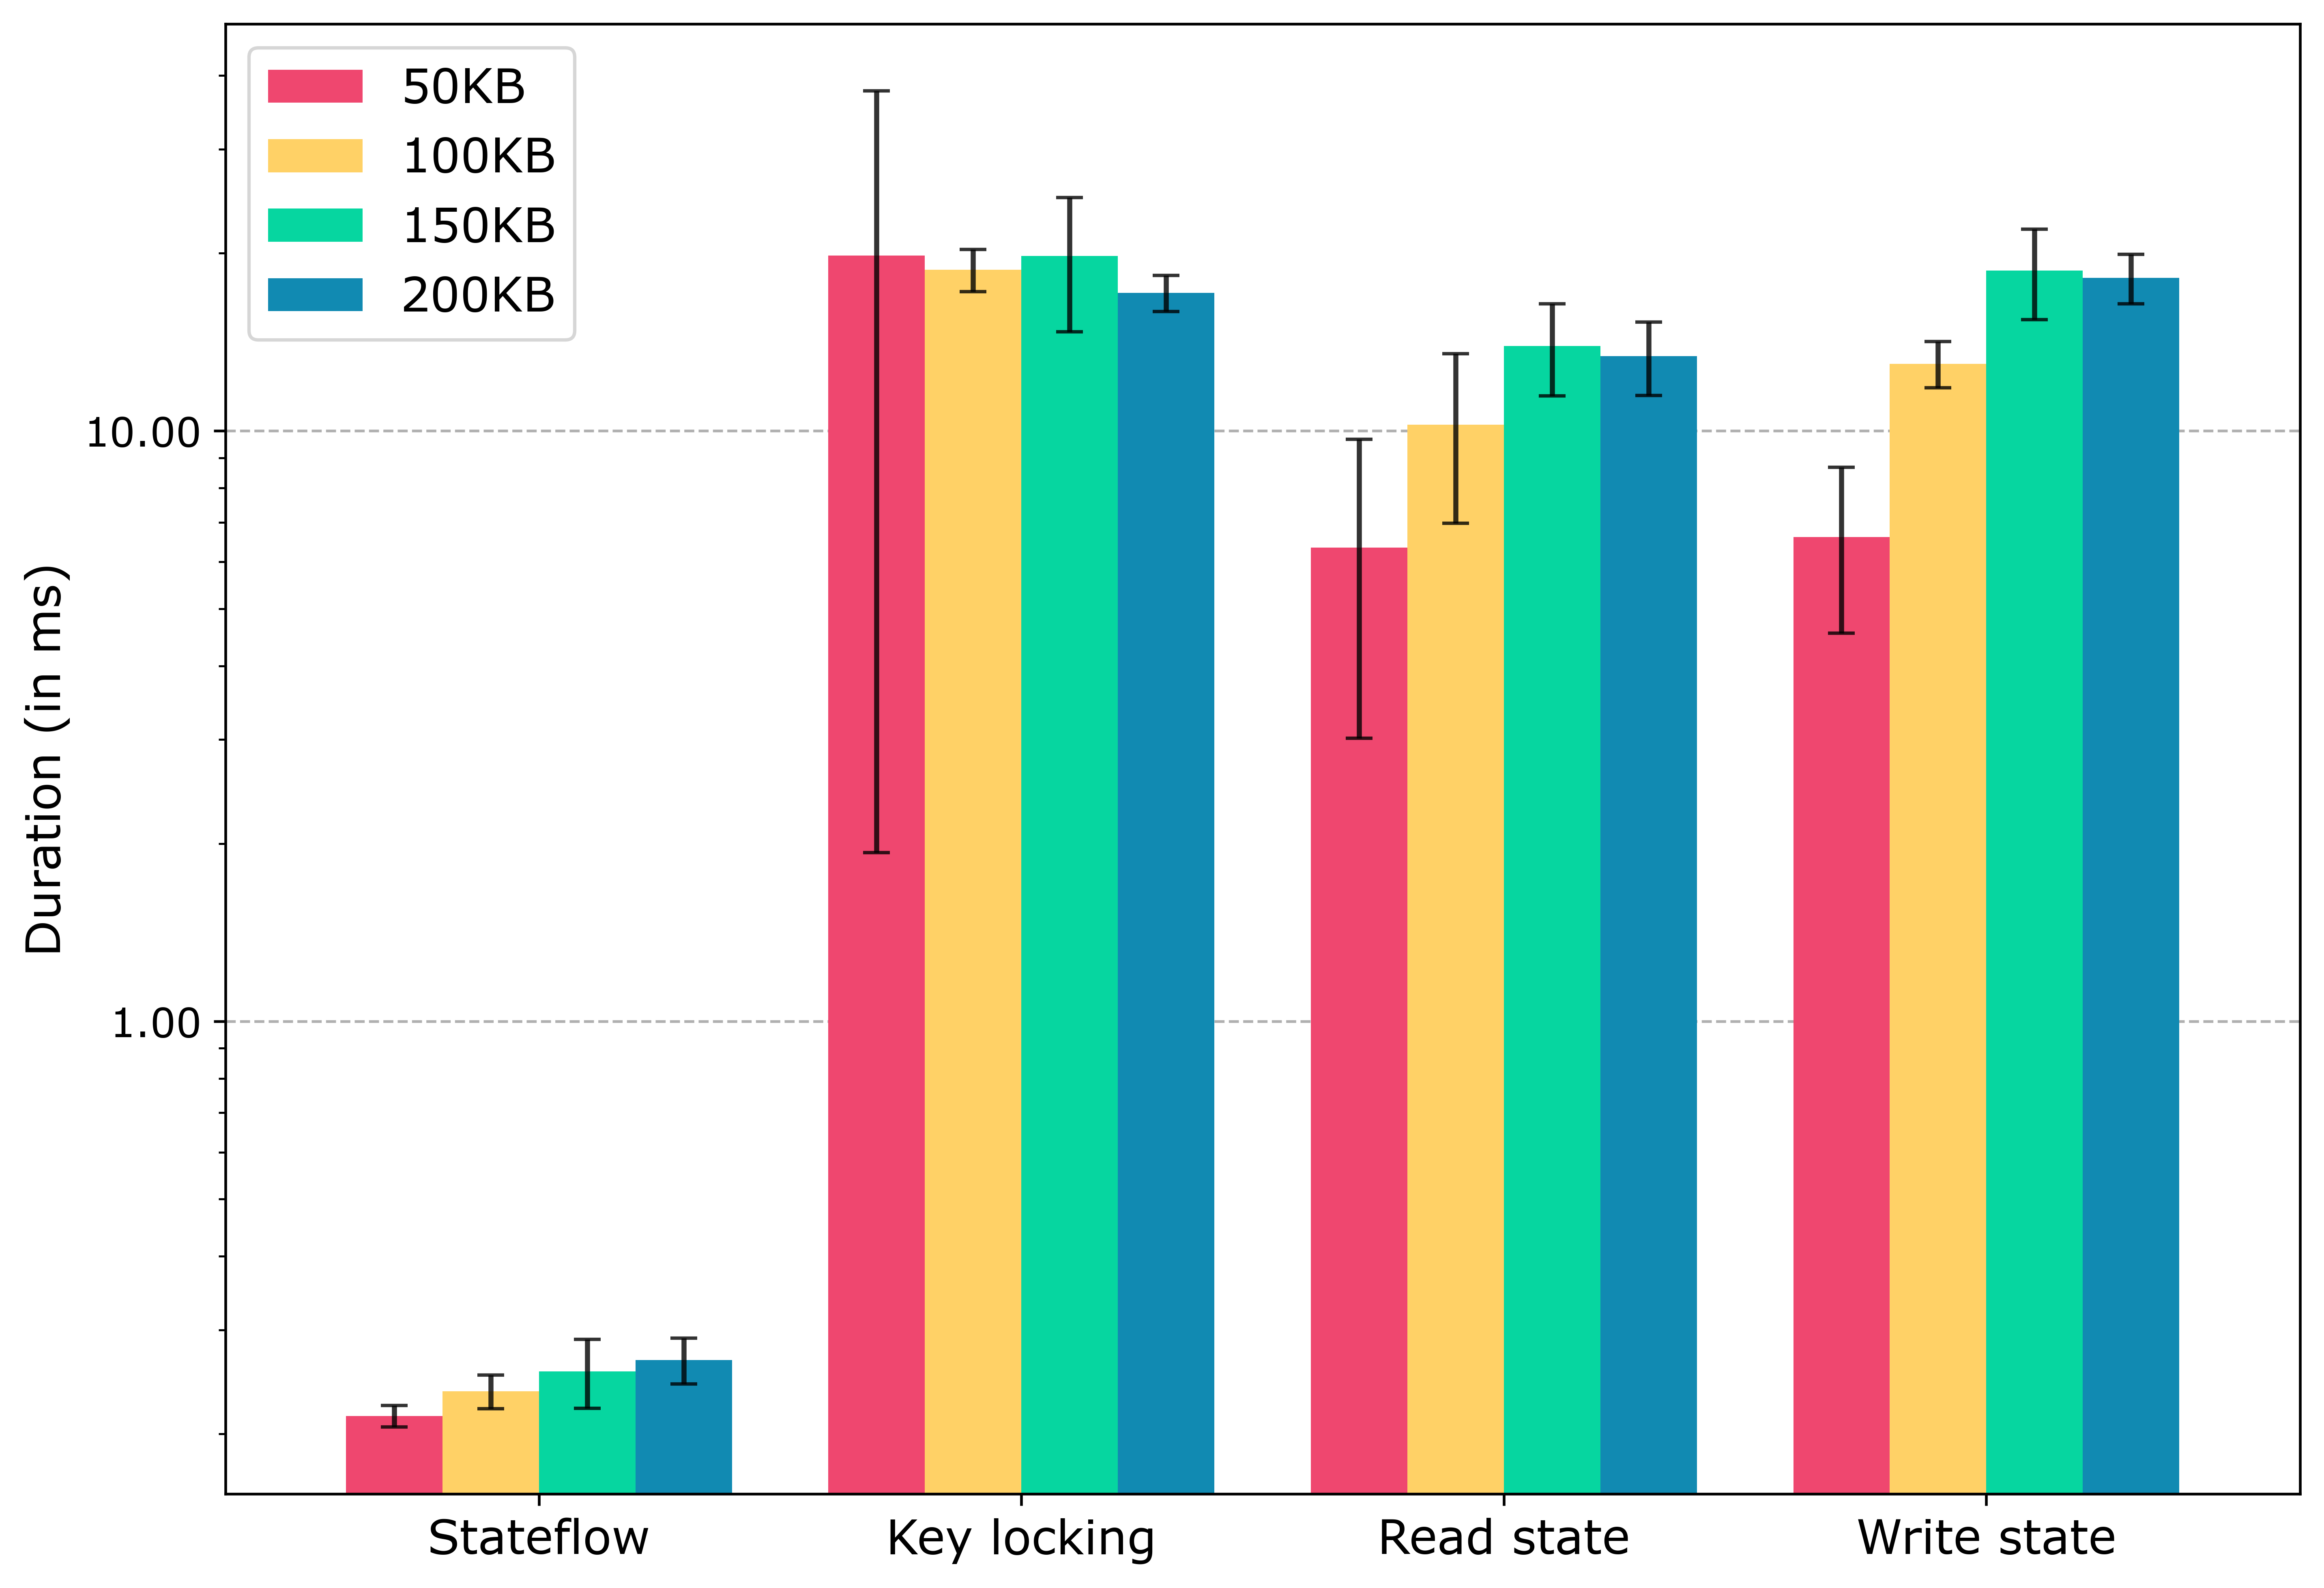

In [51]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateflow", "Key locking", "Read state", "Write state"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [45]:
rel_fiftykb_mean = fiftykb_data[["stateflow", "aws"]].mean()
total_fiftykb = rel_fiftykb_mean.sum()
rel_fiftykb = ((rel_fiftykb_mean / total_fiftykb) * 100).to_frame("50KB")

rel_hundredkb_mean = hundredkb_data[["stateflow", "aws"]].mean()
total_hundredkb = rel_hundredkb_mean.sum()
rel_hundredkb = ((rel_hundredkb_mean / total_hundredkb) * 100).to_frame("100KB")

rel_hundredfiftykb_mean = hundredfiftykb_data[["stateflow", "aws"]].mean()
total_hundredfiftykb = rel_hundredfiftykb_mean.sum()
rel_hundredfiftykb = ((rel_hundredfiftykb_mean / total_hundredfiftykb) * 100).to_frame("150KB")

rel_twohundredkb_mean = twohundredkb_data[["stateflow", "aws"]].mean()
total_twohundredkb = rel_twohundredkb_mean.sum()
rel_twohundredkb = ((rel_twohundredkb_mean / total_twohundredkb) * 100).to_frame("200KB")

rel_overhead = pd.concat([rel_fiftykb, rel_hundredkb, rel_hundredfiftykb, rel_twohundredkb], axis=1)
#ax = rel_overhead.transpose().plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], rot=0, stacked=True, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
print(rel_overhead)

                50KB      100KB      150KB      200KB
stateflow   0.650241   0.622768   0.334998   0.544944
aws        99.349759  99.377232  99.665002  99.455056
